# **Logistic Regression from scratch**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
np.random.seed(1234)

In [6]:
def linear_combination(X:np.ndarray,w:np.ndarray)->np.ndarray:
  return X@w

In [7]:
def sigmoid(z:np.ndarray)->np.ndarray:
  return 1/(1+np.exp(-z))

In [8]:
def predict(X:np.ndarray, w:np.ndarray, threshold:float)->np.ndarray:
  return np.where(sigmoid(linear_combination(X,w))>threshold,1,0)

In [9]:
feature_matrix=np.array([[1,20,2],[1,2,2]])
weight_vector=np.array([-1, 0 ,1])

print("Shape of feature matrix: ", feature_matrix.shape)
print("Shape of weight vector: ", weight_vector.shape)

class_labels=predict(feature_matrix, weight_vector,0.5)

print("Shape of output: ", class_labels.shape)
print("Class labels: ", class_labels)

Shape of feature matrix:  (2, 3)
Shape of weight vector:  (3,)
Shape of output:  (2,)
Class labels:  [1 1]


## **Loss Function**

In [10]:
# binary cross entropy loss with regularization

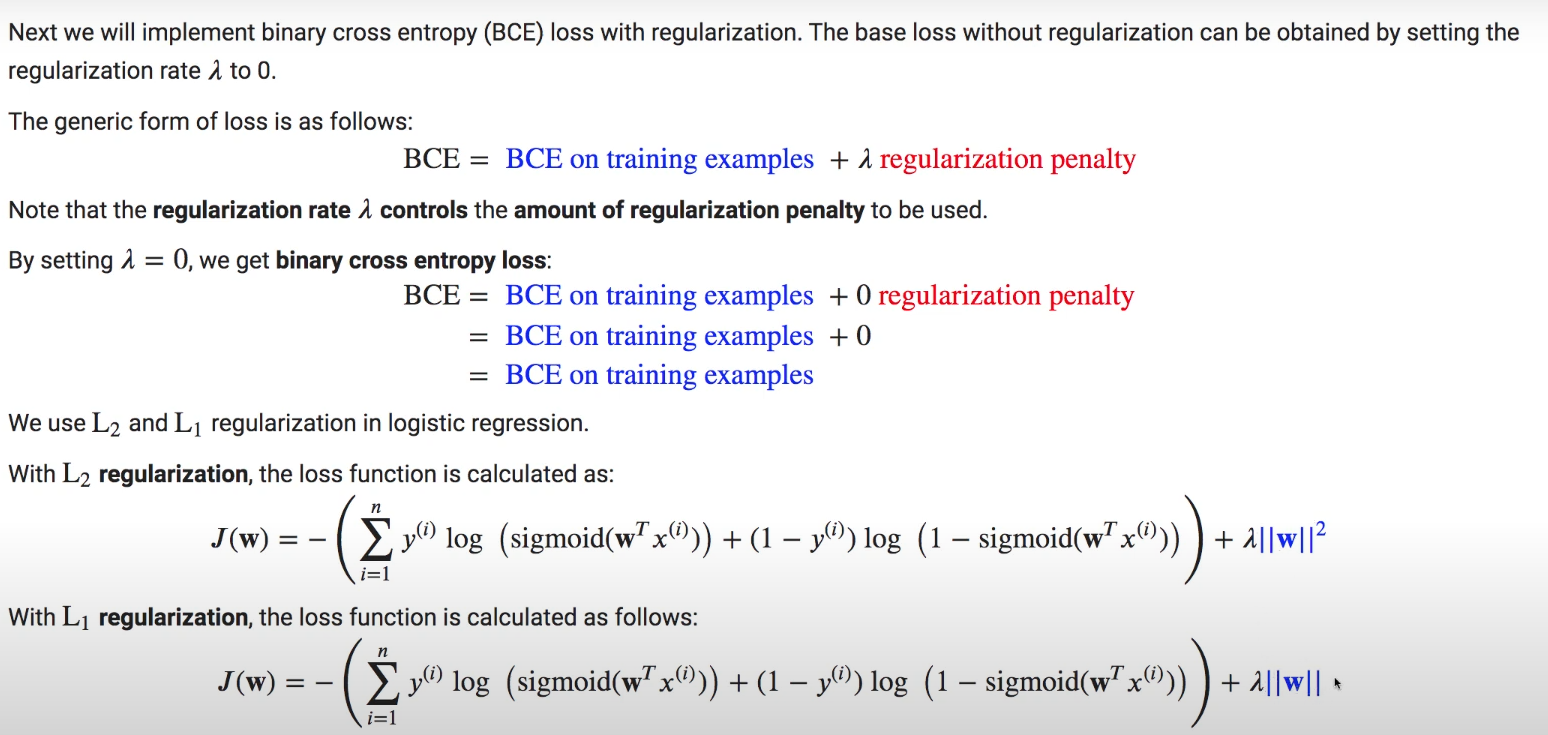

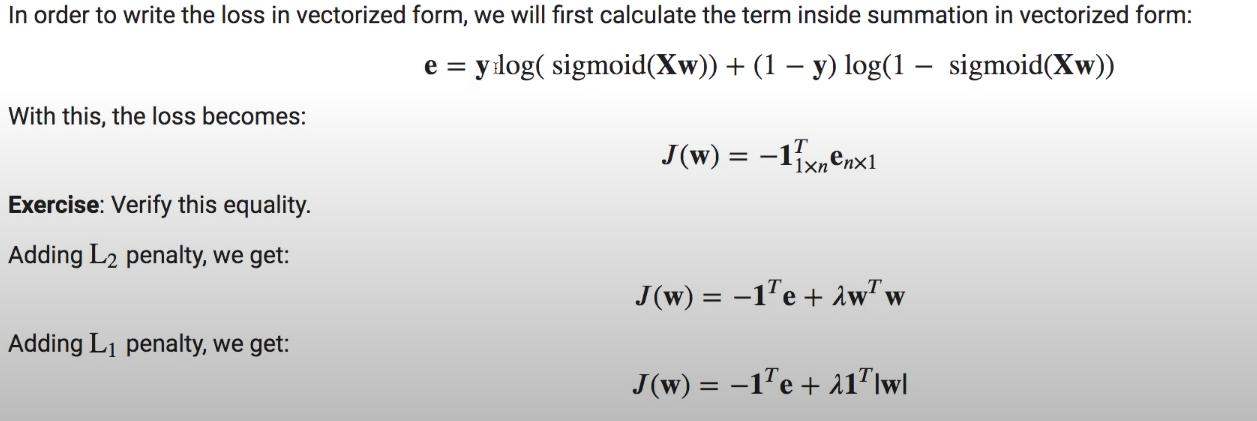

In [11]:
def loss(y, sigmoid_vector, weight_vector, l1_reg_rate, l2_reg_rate):
  return (-1*(np.sum(y*np.log(sigmoid_vector)+(1-y)*np.log(1-sigmoid_vector)))
  +l2_reg_rate*np.dot(np.transpose(weight_vector),weight_vector)
  +l1_reg_rate*np.sum(np.abs(weight_vector)))

## **Optimization**

In [60]:
def calculate_gradient(X:np.ndarray, y:np.ndarray, w:np.ndarray, reg_rate:float)->np.ndarray:
  return np.transpose(X)@(sigmoid(linear_combination(X,w))-y)+reg_rate*w

X=np.array([[1,2],[1,3]])
y=np.array([[1],[0]])
w=np.array([[0.1],[0.2]])
calculate_gradient(X,y,w,0)

array([[0.2906471 ],
       [1.24948198]])

In [13]:
class LogisticRegression(object):

  def set_weight_vector(self,w):
    self.w=w
  
  def linear_combination(self, X:np.ndarray)->np.ndarray:
    return X@self.w
  
  def sigmoid(self, z:np.ndarray):
    return 1/(1+np.exp(-z))

  def activation(self, X:np.ndarray)->np.ndarray:
    return self.sigmoid(self.linear_combination(X))

  def predict(self, x:np.ndarray, threshold:float=0.5):
    return (self.activation(x)>threshold).astype(int)
  
  def loss(self, X:np.ndarray, y:np.ndarray, reg_rate:float)->float:
    predicted_prob=self.activation(X)
    return (-1*(np.sum(y*np.log(predicted_prob)+(1-y)*np.log(1-predicted_prob)))+
            reg_rate*np.dot(np.transpose(self.w), self.w))
  
  def calculate_gradient(self, X:np.ndarray, y:np.ndarray,reg_rate:float)->np.ndarray:
    return np.transpose(X)@(self.activation(X)-y)+reg_rate*self.w

  def update_weights(self, grad:np.ndarray,lr:float)->np.ndarray:
    return self.w-lr*grad
  def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float, reg_rate:float)->np.ndarray:
    self.w=np.zeros(X.shape[1])
    self.w_all=[]
    self.err_all=[]
    for i in np.arange(0, num_epochs):
      dJdW=self.calculate_gradient(X,y,reg_rate)
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y,reg_rate))
      self.w=self.update_weights(dJdW, lr)
    return self.w

# **Linearly seperable variables**

In [14]:
#@title Toy data set
def create_toy_data():
  x0=np.random.normal(size=50).reshape(-1,2)-1
  x1=np.random.normal(size=50).reshape(-1,2)+1

  return np.concatenate([x0,x1]), np.concatenate([-np.zeros(25), np.ones(25)]).astype(np.int)

In [15]:
feature_matrix, label_vector= create_toy_data()
print('Shape of feature matrix: ', feature_matrix.shape)
print('Shape of label vector: ', label_vector.shape)
feature_matrix

Shape of feature matrix:  (50, 2)
Shape of label vector:  (50,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array([[-0.52856484, -2.19097569],
       [ 0.43270697, -1.3126519 ],
       [-1.72058873, -0.11283706],
       [-0.14041159, -1.6365235 ],
       [-0.98430363, -3.24268495],
       [ 0.15003572, -0.00805398],
       [-0.04667587, -3.02125482],
       [-1.33407737, -0.99788164],
       [-0.59454659, -0.71090806],
       [ 0.32115819, -2.54690555],
       [-1.20264632, -1.65596934],
       [-0.80657862, -0.44656109],
       [ 0.31815155, -1.46930528],
       [-0.32444591, -2.81702723],
       [-1.18310854,  0.05896919],
       [-1.39784023, -0.66256235],
       [ 0.04757857,  0.04593826],
       [-0.13628271, -1.12209157],
       [-0.87528705, -1.32279481],
       [-0.15832529,  1.39096052],
       [-0.92380041, -1.56644593],
       [-0.96385806, -3.0749776 ],
       [-0.7522078 , -1.89715678],
       [-1.13679483, -0.98171081],
       [-0.24458602, -0.78473142],
       [ 1.84100879, -0.44581008],
       [-0.40197328,  0.8990818 ],
       [ 0.45175755,  0.85538049],
       [ 1.35402033,

In [16]:
assert feature_matrix.shape[0]==label_vector.shape[0]

In [17]:
#@title Polynomial Transformation
import itertools
import functools
def get_combinations(x,degree):
  return itertools.combinations_with_replacement(x,degree)

def compute_new_features(items):
  return functools.reduce(lambda x,y:x*y,items)

import numpy as np

def polynomial_transform(x,degree,logging=False):
  if x.ndim==1:
    x=x[:,None]
  x_t=x.transpose()
  features=[np.ones(len(x))]

  if logging:
    print("input: ",x)
  for degree in range(1, degree+1):
    for items in get_combinations(x_t,degree):
      features.append(compute_new_features(items))
      if logging:
        print(items,':',compute_new_features(items))
  if logging:
    print(np.asarray(features).transpose())
  return np.asarray(features).transpose()

In [18]:
feature_matrix_bias=polynomial_transform(feature_matrix, degree=1)
feature_matrix_bias

array([[ 1.        , -0.52856484, -2.19097569],
       [ 1.        ,  0.43270697, -1.3126519 ],
       [ 1.        , -1.72058873, -0.11283706],
       [ 1.        , -0.14041159, -1.6365235 ],
       [ 1.        , -0.98430363, -3.24268495],
       [ 1.        ,  0.15003572, -0.00805398],
       [ 1.        , -0.04667587, -3.02125482],
       [ 1.        , -1.33407737, -0.99788164],
       [ 1.        , -0.59454659, -0.71090806],
       [ 1.        ,  0.32115819, -2.54690555],
       [ 1.        , -1.20264632, -1.65596934],
       [ 1.        , -0.80657862, -0.44656109],
       [ 1.        ,  0.31815155, -1.46930528],
       [ 1.        , -0.32444591, -2.81702723],
       [ 1.        , -1.18310854,  0.05896919],
       [ 1.        , -1.39784023, -0.66256235],
       [ 1.        ,  0.04757857,  0.04593826],
       [ 1.        , -0.13628271, -1.12209157],
       [ 1.        , -0.87528705, -1.32279481],
       [ 1.        , -0.15832529,  1.39096052],
       [ 1.        , -0.92380041, -1.566

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_matrix_bias, label_vector)

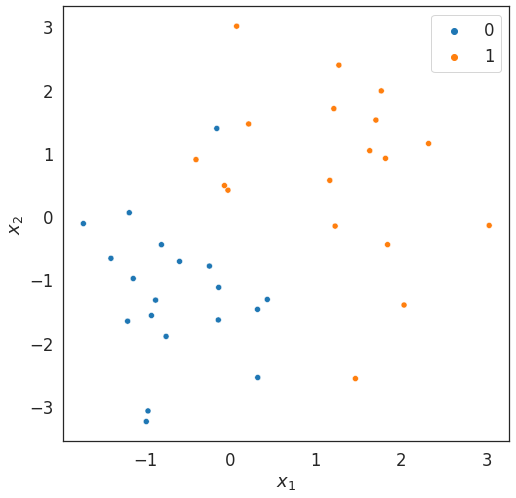

In [20]:
sns.set_style('white')
f=plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale=1.5,rc={"lines.linewidth":2.5})

sns.scatterplot(data=x_train, x=x_train[:,-2],y=x_train[:,-1], hue=y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [21]:
log_reg=LogisticRegression()
log_reg.gd(x_train, y_train, num_epochs=1000, reg_rate=0, lr=1e-2)

array([-0.14559758,  4.43289743,  1.94514132])

In [22]:
#@markdown Learning curve
def plot_learning_curve(err):
  plt.plot(np.arange(len(err)), err, 'r-')
  plt.xlabel('Iter #')
  plt.ylabel('$\mathbf{J(w)}$')

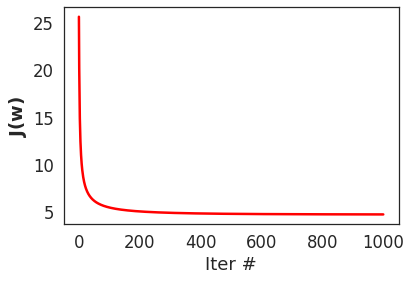

In [23]:
plot_learning_curve(log_reg.err_all)

In [24]:
print("Weight vector: ",log_reg.w)

Weight vector:  [-0.14559758  4.43289743  1.94514132]


In [25]:
#@title Model Visualization
import seaborn as sns
sns.set_context('notebook',font_scale=1.5,rc={"lines.linewidth":2.5})
def visualize_model(x_train,labels,lsc_obj,degree=1):
  f=plt.figure(figsize=(15,15))

  x1_min=np.min(x_train[:,1])
  x1_max=np.max(x_train[:,1]) 
  x2_min=np.min(x_train[:,2])
  x2_max=np.max(x_train[:,2])

  x1_test,x2_test=np.meshgrid(np.linspace(x1_min,x1_max,100),np.linspace(x2_min, x2_max,100))
  x_test=np.array([x1_test, x2_test]).reshape(2,-1).T
  x_test_poly=polynomial_transform(x_test,degree=degree)
  y_test=lsc_obj.predict(x_test_poly)

  sns.scatterplot(data=x_train, x=x_train[:,1],y=x_train[:,2],hue=labels)
  plt.contourf(x1_test,x2_test,y_test.reshape(100,100),alpha=0.5,
               levels=np.linspace(0,1,3))
  
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")
  plt.xlim(x1_min,x1_max)
  plt.ylim(x2_min,x2_max)
  plt.gca().set_aspect('equal', adjustable='box')
  plt.show()


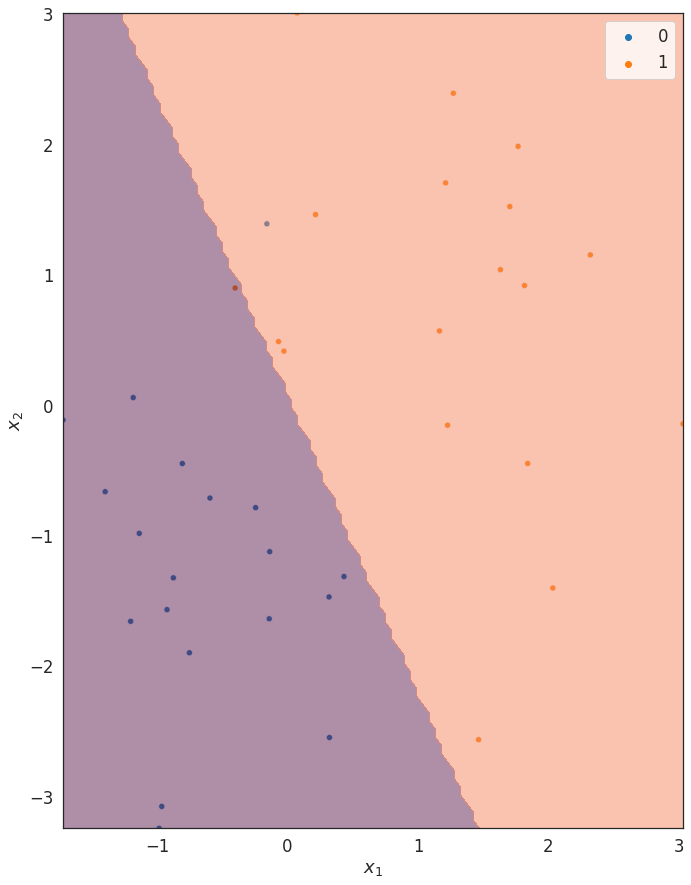

In [26]:
visualize_model(x_train, y_train, log_reg)

In [27]:
y_test_hat=log_reg.predict(x_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_hat, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.78      1.00      0.88         7

    accuracy                           0.85        13
   macro avg       0.89      0.83      0.84        13
weighted avg       0.88      0.85      0.84        13



# **Polynomial Least Square classification**

In [29]:
from sklearn.datasets import make_circles
feature_matrix, label_vector=make_circles()

In [30]:
assert feature_matrix.shape[0]== label_vector.shape[0]

In [31]:
x_poly=polynomial_transform(feature_matrix, degree=2)


In [32]:
x_train, x_test, y_train, y_test= train_test_split(x_poly, label_vector)

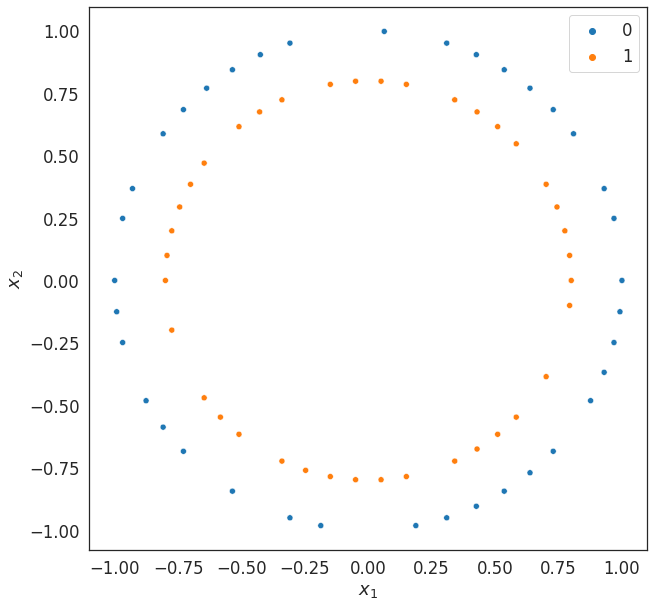

In [33]:
sns.set_style('white')
f=plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=1.5, rc={'lines.linewidth':2.5})
sns.scatterplot(data=x_train, x=x_train[:,1], y=x_train[:,2], hue=y_train)
plt.xlabel("$x_1$")
plt.ylabel('$x_2$')
plt.show()

In [34]:
log_reg_poly=LogisticRegression()
log_reg_poly.gd(x_train, y_train, reg_rate=0, num_epochs=10000, lr=1e-2)

array([ 2.03212877e+01, -3.62360899e-02,  7.36788518e-03, -2.49434641e+01,
        1.06058158e-01, -2.47207876e+01])

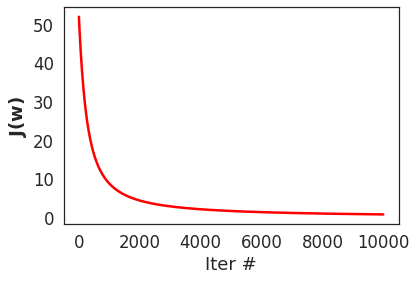

In [35]:
plot_learning_curve(log_reg_poly.err_all)

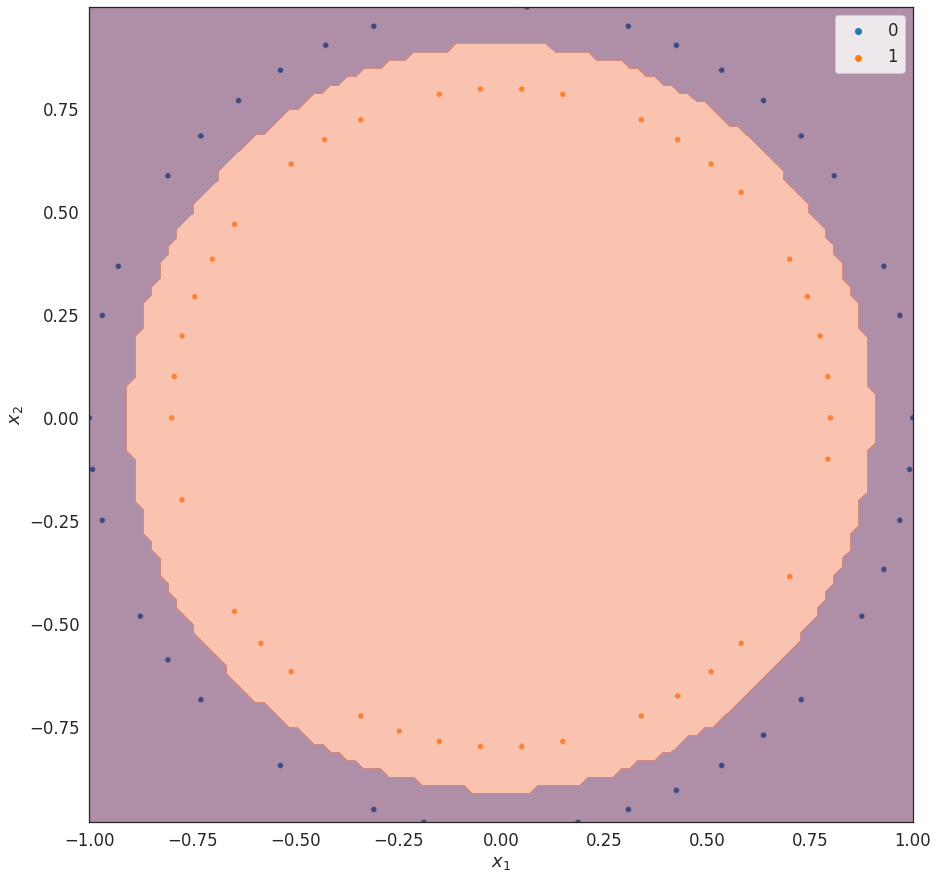

In [36]:
visualize_model(x_train, y_train, log_reg_poly, degree=2)

In [37]:
y_test_hat=log_reg_poly.predict(x_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_hat, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



# **Logistic Regression Visualization**

In [40]:
from matplotlib import cm
from matplotlib.colors import colorConverter, ListedColormap

In [42]:
log_reg_vis=LogisticRegression()

In [43]:
feature_matrix, label_vector=create_toy_data()
feature_matrix_bias=polynomial_transform(feature_matrix, degree=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [44]:
x_train, x_test, y_train, y_test= train_test_split(feature_matrix_bias, label_vector)

In [45]:
point_count=25
w1=np.linspace(-5,5, num=point_count)
w2=np.linspace(-5,5, num=point_count)
w1_list, w2_list=np.meshgrid(w1, w2)

In [46]:
loss=np.zeros((point_count, point_count))

In [47]:
for i in range(point_count):
  for j in range(point_count):
    weight_vector=np.array([0, w1_list[i,j], w2_list[i,j]])
    log_reg_vis.set_weight_vector(weight_vector)
    loss[i,j]=log_reg_vis.loss(x_train, y_train, reg_rate=0)

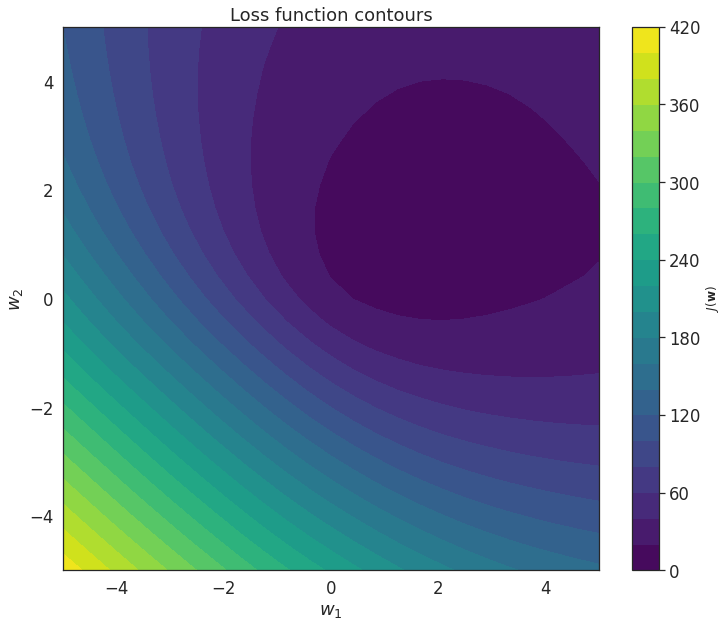

In [49]:
plt.figure(figsize=(12,10))
plt.contourf(w1_list, w2_list, loss, 20, cmap=cm.viridis)
cbar=plt.colorbar()
cbar.ax.set_ylabel('$J(\mathbf{w})$', fontsize=12)
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title('Loss function contours')
plt.grid()
plt.show()

In [50]:
log_reg_vis.gd(x_train, y_train, num_epochs=1000, reg_rate=0, lr=1e-2)

array([0.6958067 , 1.61362475, 0.87521977])

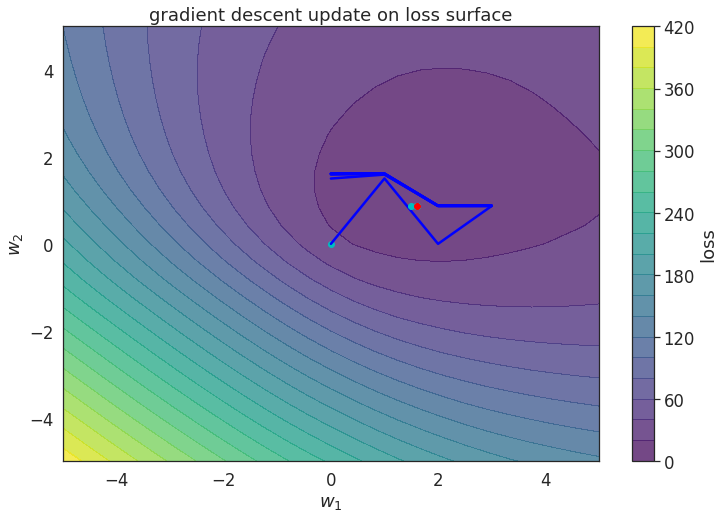

In [54]:
plt.figure(figsize=(12,8))
plt.contourf(w1_list, w2_list, loss, 20, alpha=0.75,cmap=cm.viridis)
cbar=plt.colorbar()
cbar.ax.set_ylabel('loss')

for i in range(1, 900, 100):
  w1=log_reg_vis.w_all[(i-1)]
  w2=log_reg_vis.w_all[(i+100)]

  plt.plot(w1[1],w1[2], marker='o',color='c')
  plt.plot([w1[1],w2[1],w1[2],w2[2]], linestyle ='-',color='b')

w1=log_reg_vis.w_all[-1]
plt.plot(w1[1],w1[2],marker='o',color='r')

plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title('gradient descent update on loss surface')
plt.show()

# **Practice Problems & Graded Assignments**

In [56]:
#@title PPA 1
import numpy as np
def cross_entropy(y,sigmoid_vector,w, reg_type='l2',reg_rate=0):
    if reg_type=='l1':
        return (-1*(np.sum(y*np.log(sigmoid_vector)+(1-y)*np.log(1-sigmoid_vector)))+reg_rate*np.sum(np.abs(w))/2)
    if reg_type=='l2':
        return (-1*(np.sum(y*np.log(sigmoid_vector)+(1-y)*np.log(1-sigmoid_vector)))+reg_rate*np.dot(np.transpose(w),w)/2)
 

In [57]:
#@title PPA 2
import numpy as np
def sigmoid(X):
  #Your code
  sig=1/(1+np.exp(-X))
  return sig

In [58]:
#@title GPA 1
import numpy as np
def sigmoid(z:np.ndarray)->np.ndarray:
    return 1/(1+np.exp(-z))
def predict_label(X,w):
    label1=np.where(sigmoid(X@w)>=0.75,1,0)
    label2=np.where(sigmoid(X@w)<=0.25,-1,0)
    labels=label1+label2
    
    
    return labels

In [59]:
#@title GPA 2
import numpy as np
def sigmoid(X):
    return 1/(1+np.exp(-X))
def gradient(X,y,w,reg_rate):
    G=np.transpose(X)@(sigmoid(X@w)-y)+reg_rate*w
    return G

In [61]:
#@title GPA 3
import numpy as np
def sigmoid(X):
    return 1/(1+np.exp(-X))
def update_w(X, y, w, reg_rate, lr):
    y_hat=np.transpose(X)@(sigmoid(X@w)-y)+reg_rate*w
    U=w-lr*y_hat
    return U

In [63]:
y = np.array([ 1, 0, 0, 1, 0, 0, 0, 1, 1 ])
 
y_hat= np.array([ 0.9, 0.3, 0.25, 0.88, 0.1, 0.1, 0.6, 0.9, 0.75])

loss=(-1*(np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))))

In [64]:
loss

2.397605254857639